<h1>Tables des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
 
# Charger le dataset de patients diabétiques
diabetes = datasets.load_diabetes()
 
print(diabetes)
 

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [2]:
#print shapes
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [3]:
#print description feature 5 premieres valeurs
print(diabetes.data[:5,:10])

#print description target 5 premieres valeurs
print(diabetes.target[:5,])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


In [4]:
# On sélectionne seulement une feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]
#print des 5 premiers lignes de feature selectionnée
print(diabetes_X_temp[:5,])

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [5]:
# Décomposer les données en training/testing  
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]
print(diabetes_X_train[:5,])

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [6]:

# Décomposer les targets en training/testing  
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
print(diabetes_y_train[:5,])

[151.  75. 141. 206. 135.]


In [7]:
# Créer l'objet linear regression  
regression = linear_model.LinearRegression()
 
# Faire apprendre le model en utilisant les training set
regression.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [12]:
# Affichage des coefficient
print('Coefficients: \n', regression.coef_)
print('Intercept: \n', regression.intercept_)
# mean square error
print("Residual sum of squares: %.2f"
 % np.mean((regression.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1  prediction parfaite
print('Variance score: %.2f' % regression.score(diabetes_X_test, diabetes_y_test))
 

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616167
Residual sum of squares: 2548.07
Variance score: 0.47


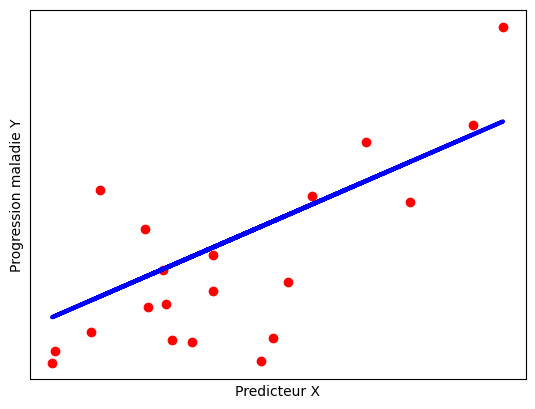

In [9]:
# Graphe de sortie
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')
plt.plot(diabetes_X_test, regression.predict(diabetes_X_test), color='blue',
 linewidth=3)
plt.xticks(())
plt.yticks(())
plt.ylabel('Progression maladie Y') 
plt.xlabel('Predicteur X')
plt.show()

In [10]:
#Comparaison avec Ridge
from sklearn.linear_model import Ridge ,Lasso
# Créer l'objet linear regression Ridge 
ridge = Lasso()
 
# Faire apprendre le model en utilisant les training set
ridge.fit(diabetes_X_train, diabetes_y_train)

Lasso()

In [11]:
# Affichage des coefficient
print('Coefficients: \n', ridge.coef_)
# mean square error
print("Residual sum of squares: %.2f"
 % np.mean((ridge.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1  prediction parfaite
print('Variance score: %.2f' % ridge.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [496.66920971]
Residual sum of squares: 3482.77
Variance score: 0.28
